# Tarea 3 - Exploración de datos

En esta tarea estaremos poniéndo en práctica la mayor parte de las herramientas que hemos vistos hasta ahora. Estaremos utilizando los datasets provistos por Seaborn.

1. Elija uno de los datasets provistos por Seaborn. Algunas recomendaciones son `flights.csv`, `iris.csv`, `mpg.csv`, `penguins.csv`, `planets.csv`, `tips.csv`, `titanic.csv`. Recuerde cargar el dataset con la función [seaborn.load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html). La lista completa de datasets se encuentra [en el siguiente enlace](https://github.com/mwaskom/seaborn-data)
1. Cargue sus datos a un nuevo dataframe de Pandas. Importe cualquier otra librería que necesite.
1. Muestre el `head()` de los datos.
1. ¿De qué tamaño es el dataset? ¿cuántas columnas y filas tiene?
1. ¿Cuáles columnas contiene el dataset? ¿Cuáles son los nombres de las columnas?
1. ¿Cuáles valores únicos contiene cada columna?
1. De las columnas de su dataset elegido, elija dos columnas y explique qué significan estas columnas, en términos sencillos.
1. Muestre la distribución cuantitativa de los datos para ambas variables elegidas en el punto anterior utilizando un `boxplot`. Si es necesario, para tener una mejor visualización, elija variables diferentes al punto anterior.
1. Elija uno de los siguientes puntos:

    a. Si sus datos contiene información temporal/de tiempo, como años, meses, días, horas, etc. Cree una gráfica con plt.plot() con alguna de las variables. Por ejemplo: vuelos por año (flights.csv), planetas descubiertos por año (planets.csv), total de la cuenta por día (tips.csv)
    
    b. Si sus datos no contienen información temporal, grafique la comparación entre una de las columnas en un histograma. Por ejemplo 'flipper length' para las 3 diferentes especies de pinguinos (dataset pinguins.csv). Tamaño sepal 'sepal_length' comparado entre las 3 especies. Ver ejemplo
    
9.a <img src='https://i0.wp.com/thecleverprogrammer.com/wp-content/uploads/2020/05/Untitled-8.png?resize=520%2C314&ssl=1' width=400>

9.b <img src='https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/README-flipper-hist-1.png' width=400>

10. Cree dos anotaciones en su gráfica elegida. Cree una anotación solo con texto y elija algún formato para alguno de los puntos de la gráfica.

11. Cree una segunda anotación, utilizando la función `annotate` con la opción de `arrowprops`

12. ¿Cómo se relacionan las variables entre ellas? ¿Hay alguna correlación? Describa esta correlación utilizando la función `df.corr()` donde df es el nombre de su dataframe.

13. Visualizemos mejor las correlaciones. Agregue un `sns.heatmap(df.corr())` ¿Qué puede inferir de esto? ¿Existe alguna variable que se mueva cercano a 1 junto a otra? Escriba una inferencia que puede hacer sobre los datos.

14. Finalmente, visualicemos mejor estas correlaciones con una matriz de distribución, utilice la función `sns.pairplot`. Recuerde definir el parámetro `hue` como las categorías que quiere explorar (especies de planta, especies de pinguino, días, etc). Para ver un ejemplo [siga el siguiente enlace](http://seaborn.pydata.org/examples/scatterplot_matrix.html) ¿Qué otra inferencia puede hacer de sus datos a partir de esta matriz

In [259]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

datos = sns.load_dataset("penguins")
datos.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [22]:
datos.size

2408

In [27]:
datos.shape

(344, 7)

In [42]:
cols= datos.columns.tolist()
cols

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [231]:
for col in cols:
    print(col)
    uniq= datos[col].unique()
    print(uniq)
    print("Total de valores únicos: "+ str(len(uniq))+ "\n")

species
['Adelie' 'Chinstrap' 'Gentoo']
Total de valores únicos: 3

island
['Torgersen' 'Biscoe' 'Dream']
Total de valores únicos: 3

bill_length_mm
[39.1 39.5 40.3  nan 36.7 39.3 38.9 39.2 34.1 42.  37.8 41.1 38.6 34.6
 36.6 38.7 42.5 34.4 46.  37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2
 40.9 36.4 42.2 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 37.5 42.3 40.1
 35.  34.5 41.4 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2
 42.1 42.9 35.1 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7
 40.2 35.2 41.5 38.5 43.1 36.8 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7
 45.2 46.1 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5
 50.6 46.7 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9
 45.5 50.8 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8
 55.8 43.5 49.6 48.7 43.3 48.4 45.1 46.3 44.5 47.8 48.2 47.3 59.6 49.1
 42.6 44.4 44.  45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5
 47.4 43.4 52.1 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9]
Total de valo

____________________________________________________________________________________________

**Body_mass_g:** Se refiere a la masa corporal del pingüino en gramos

**Bill_depth_mm:** Es la profundidad del pico del pingüino en milimetros

____________________________________________________________________________________________

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_mass_g'>

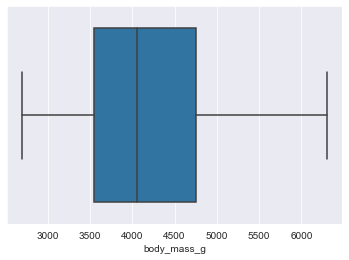

In [232]:
sns.boxplot(datos["body_mass_g"])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bill_depth_mm'>

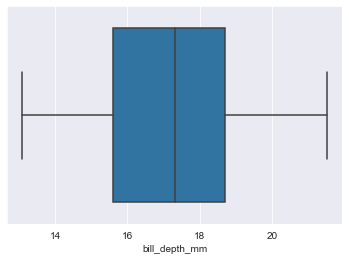

In [233]:
sns.boxplot(datos["bill_depth_mm"])

Text(0.6, 0.75, 'Machos')

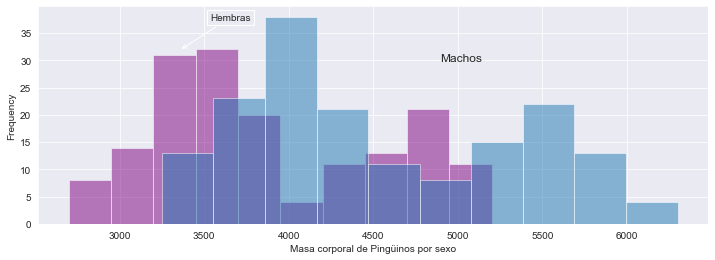

In [342]:
fig, ax = plt.subplots(figsize=(12, 4))

fem=datos[(datos["sex"]=="Female")]["body_mass_g"].plot(kind="hist", color="purple",  alpha=0.5)
male=datos[(datos["sex"]=="Male")]["body_mass_g"].plot(kind="hist", alpha=0.5)
plt.xlabel("Masa corporal de Pingüinos por sexo")
ax.annotate("Hembras", xy=(180, 210),  xycoords='figure points',
            bbox=dict(boxstyle="square", fc="none"),
            xytext=(30, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
ax.text(0.6,0.75,"Machos",fontsize=12,transform=ax.transAxes)


In [343]:
datos.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

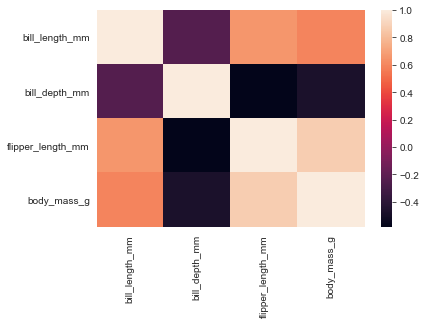

In [344]:
sns.heatmap(datos.corr())

Existe una fuerte correlación entre la masa corporal del pingüino y el tamaño de la aleta, además de cierta relación entre la masa corporal y el tamaño del pico.

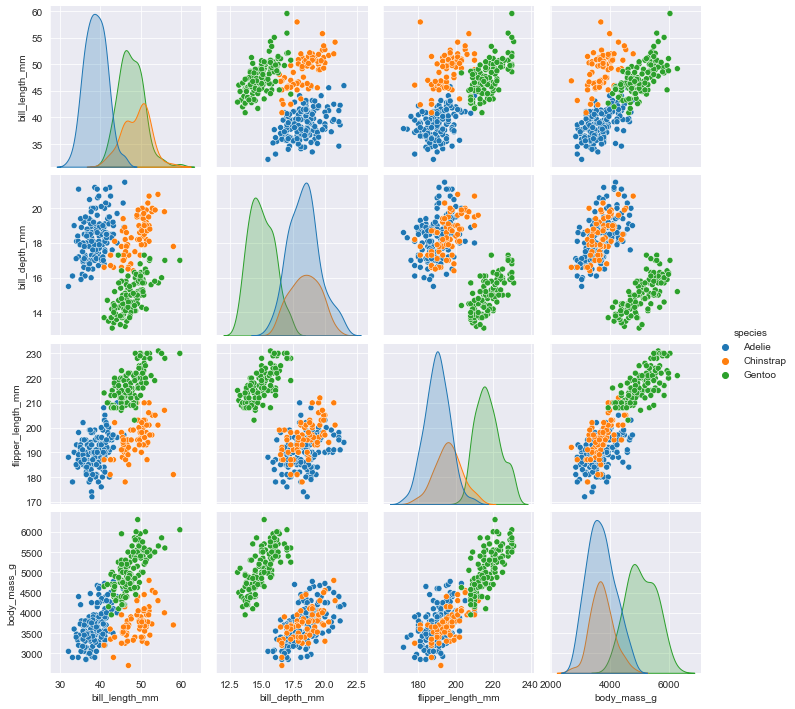

In [350]:
sns.pairplot(datos, hue="species")

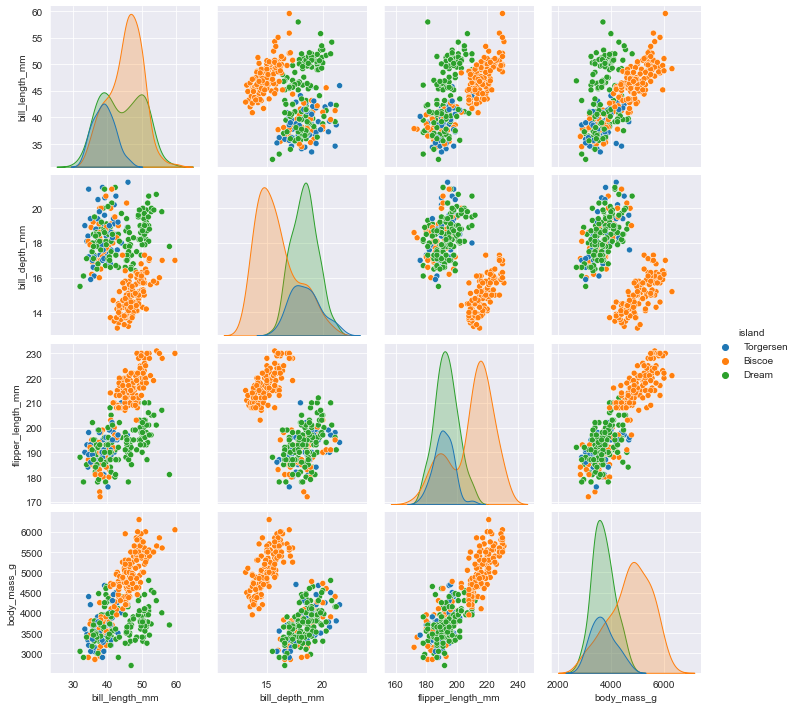

In [357]:
sns.pairplot(datos, hue="island")

____________________________________________________________________________________________________

Se concluye que:

1. La profundidad del pico y su largo no son siempre directamente proporcionales.
1. En cambio, la masa corporal y el tamaño de las aletas sí lo son.
1. Los pinguinos de la Isla Biscoe tienden a tener mayores dimensiones, entonces se infiere que la especie que más se encuentra es la Adelie
____________________________________________________________________________________________________


